In [1]:
import pickle

objects = []
file_name = "audioDataTrainLabels.pickle"

with (open(file_name, "rb")) as f:
    while True:
        try:
            objects.append(pickle.load(f))
        except EOFError:
            break
f.close()

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 8000, filters = '!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')

temp = objects[1004][1].split('\n')
temp_text = temp[0][6:]
tokenizer.fit_on_texts(temp_text)
text_total_train = tokenizer.texts_to_sequences(temp_text)
print(len(text_total_train))
print(len(temp_text))

49
49


In [3]:
objects[1002]

['267278-12',
 "12     Which is exactly what this movie is, it's stupid\nName: 4, dtype: object",
 0.33333334,
 0.33333334,
 0.0,
 0.0,
 0.0,
 0.33333334,
 0.0]

In [4]:
import pandas as pd
import numpy as np
data =[]
for i in range(1, len(objects)):
    #add text
    temp = objects[i][1].split('\n')
    text_obj = temp[0][6:]
    
    #add sentiment
    sentiment = []
    sentiment.append(objects[i][2])
    sentiment.append(objects[i][3])
    sentiment.append(objects[i][4])
    sentiment.append(objects[i][5])
    sentiment.append(objects[i][6])
    sentiment.append(objects[i][7])
    row = [text_obj, np.array(sentiment)]
    data.append(row)

df = pd.DataFrame(data, columns = ['text', 'sentiment'])
df.head()

,text,sentiment
0,his is another of my favorite albums,"[1.0, 0.0, 0.33333334, 0.0, 0.0, 0.0]"
1,"ow you might wonder, why are you buying your ...","[1.0, 0.33333334, 0.0, 0.0, 0.0, 0.0]"
2,have multiple copies of albums like this tha...,"[-0.33333334, 0.6666667, 0.0, 0.0, 0.0, 0.0]"
3,ello my name is FJ Cava and I have an MBA fro...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
4,'m also owner of the Bayview Webspot here in ...,"[0.0, 0.0, 0.6666667, 0.0, 0.0, 0.0]"


In [5]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop = stopwords.words('english')

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def remove_stopwords(text):
    sw = stopwords.words('english')
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanzhangzhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df['text'] = df['text'].apply(remove_punctuation).apply(remove_stopwords)
df.to_csv('afterFilter.csv')
df.head()

,text,sentiment
0,another favorite albums,"[1.0, 0.0, 0.33333334, 0.0, 0.0, 0.0]"
1,ow might wonder buying,"[1.0, 0.33333334, 0.0, 0.0, 0.0, 0.0]"
2,multiple copies albums like tha,"[-0.33333334, 0.6666667, 0.0, 0.0, 0.0, 0.0]"
3,ello name fj cava mba fro,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
4,also owner bayview webspot,"[0.0, 0.0, 0.6666667, 0.0, 0.0, 0.0]"


In [7]:
tokenizer = Tokenizer(num_words = 8000, filters = '!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(df['text'])
df['text'] = tokenizer.texts_to_sequences(df['text'].values)

In [8]:
df.head()

,text,sentiment
0,"[136, 407, 3674]","[1.0, 0.0, 0.33333334, 0.0, 0.0, 0.0]"
1,"[41, 115, 734, 640]","[1.0, 0.33333334, 0.0, 0.0, 0.0, 0.0]"
2,"[1646, 5533, 3674, 5, 197]","[-0.33333334, 0.6666667, 0.0, 0.0, 0.0, 0.0]"
3,"[63, 4, 3675, 5534, 2769, 785]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
4,"[26, 844, 5535, 5536]","[0.0, 0.0, 0.6666667, 0.0, 0.0, 0.0]"


In [9]:
df.to_csv('afterTranslate.csv')
df.head()

,text,sentiment
0,"[136, 407, 3674]","[1.0, 0.0, 0.33333334, 0.0, 0.0, 0.0]"
1,"[41, 115, 734, 640]","[1.0, 0.33333334, 0.0, 0.0, 0.0, 0.0]"
2,"[1646, 5533, 3674, 5, 197]","[-0.33333334, 0.6666667, 0.0, 0.0, 0.0, 0.0]"
3,"[63, 4, 3675, 5534, 2769, 785]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
4,"[26, 844, 5535, 5536]","[0.0, 0.0, 0.6666667, 0.0, 0.0, 0.0]"


In [164]:
tokenizer = Tokenizer(num_words = 8000, filters = '!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(df['text'])
X_train = tokenizer.texts_to_sequences(df['text'].values)
Y_train = df['sentiment'].values

In [165]:
Y_train

array([array([1.        , 0.        , 0.33333334, 0.        , 0.        ,
              0.        ])                                               ,
       array([1.        , 0.33333334, 0.        , 0.        , 0.        ,
              0.        ])                                               ,
       array([-0.33333334,  0.6666667 ,  0.        ,  0.        ,  0.        ,
               0.        ])                                                   ,
       ...,
       array([-1.6666666 ,  0.        ,  0.        ,  0.33333334,  0.        ,
               1.        ])                                                   ,
       array([-1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
               0.33333334])                                                   ,
       array([0.33333334, 0.6666667 , 0.33333334, 0.        , 0.33333334,
              0.        ])                                               ],
      dtype=object)

In [166]:
from keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train)
Y_train = pad_sequences(Y_train)
print(X_train.shape)
print(Y_train.shape)

(16327, 9)
(16327, 6)


In [167]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

In [168]:
X_train.shape

(16327, 1, 9)

In [181]:
#set up the LSTM model
from tensorflow import keras
from keras.layers import LSTM, Dense, Dropout

#using the LSTM model with relu activation
lstm = keras.Sequential()
lstm.add(LSTM(32, input_shape = (1, X_train.shape[2]), activation='relu', return_sequences=False))
lstm.add(Dense(6))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [182]:
Y_train.shape

(16327, 6)

In [183]:
lstm.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=1, shuffle=False)

Epoch 1/100
1633/1633 [==============================] - 4s 2ms/step - loss: 804.4230
Epoch 2/100
1633/1633 [==============================] - 3s 2ms/step - loss: 16.5975
Epoch 3/100
1633/1633 [==============================] - 3s 2ms/step - loss: 6.9468
Epoch 4/100
1633/1633 [==============================] - 3s 2ms/step - loss: 1.4903
Epoch 5/100
1633/1633 [==============================] - 3s 2ms/step - loss: 0.4732
Epoch 6/100
1633/1633 [==============================] - 3s 2ms/step - loss: 0.2977
Epoch 7/100
1633/1633 [==============================] - 3s 2ms/step - loss: 0.2921
Epoch 8/100
1633/1633 [==============================] - 3s 2ms/step - loss: 0.2515
Epoch 9/100
1633/1633 [==============================] - 2s 1ms/step - loss: 0.2357
Epoch 10/100
1633/1633 [==============================] - 2s 2ms/step - loss: 0.2336
Epoch 11/100
1633/1633 [==============================] - 3s 2ms/step - loss: 0.2334
Epoch 12/100
1633/1633 [==============================] - 3s 2ms/step -

loading testing set

In [199]:
from nltk.corpus import stopwords
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np

objects = []
file_name = "audioDataTestLabels.pickle"

with (open(file_name, "rb")) as f:
    while True:
        try:
            objects.append(pickle.load(f))
        except EOFError:
            break
f.close()

data_test =[]
for i in range(1, len(objects)):
    #add text
    temp = objects[i][1].split('\n')
    text_obj = temp[0][6:]
    
    #add sentiment
    sentiment = []
    sentiment.append(objects[i][2])
    sentiment.append(objects[i][3])
    sentiment.append(objects[i][4])
    sentiment.append(objects[i][5])
    sentiment.append(objects[i][6])
    sentiment.append(objects[i][7])
    row = [text_obj, np.array(sentiment)]
    data_test.append(row)

df_test = pd.DataFrame(data_test, columns = ['text', 'sentiment'])
df_test.head()

nltk.download('stopwords')
stop = stopwords.words('english')

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def remove_stopwords(text):
    sw = stopwords.words('english')
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

df_test['text'] = df_test['text'].apply(remove_punctuation).apply(remove_stopwords)

tokenizer = Tokenizer(num_words = 8000, filters = '!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(df_test['text'])
X_test = tokenizer.texts_to_sequences(df_test['text'].values)
Y_test = df_test['sentiment'].values

X_test = pad_sequences(X_test)
Y_test = pad_sequences(Y_test)

X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

y_pred= lstm.predict(X_test)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanzhangzhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [202]:
y_pred= lstm.predict(X_test)

In [203]:
X_test.shape

(4662, 1, 9)

y1 MSE:0.8382
y2 MSE:0.2920


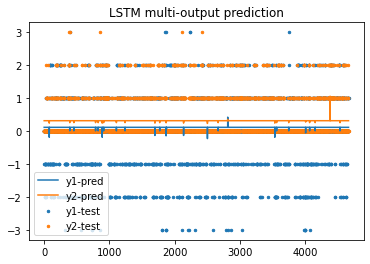

In [204]:
from sklearn.metrics import mean_squared_error
print("y1 MSE:%.4f" % mean_squared_error(Y_test[:,0], y_pred[:,0]))
print("y2 MSE:%.4f" % mean_squared_error(Y_test[:,1], y_pred[:,1])) 

x_ax = range(len(X_test))
plt.title("LSTM multi-output prediction")
plt.scatter(x_ax,Y_test[:,0],  s=6, label="y1-test")
plt.plot(x_ax, y_pred[:,0], label="y1-pred")
plt.scatter(x_ax, Y_test[:,1],  s=6, label="y2-test")
plt.plot(x_ax, y_pred[:,1], label="y2-pred")
plt.legend()
plt.show()